In [1]:
import numpy as np
import math as m
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import poisson
from scipy.stats import norm

In [2]:
#Main program
background = np.loadtxt('background.txt', skiprows=2)
data = np.loadtxt('plate.txt', skiprows=2)

dt = 3                 # s

n_b = np.mean(background[:,1])
n_s = data[:,1] - n_b
u_s = np.sqrt(data[:,1] + n_b)

r = n_s/dt
u_r = u_s/dt
u_linear = np.abs(u_r/data[:,1])

mu_c = np.mean(n_s)
mu_r = np.mean(r)

t = (data[:,0] - 1) * dt

[27.7 38.7 30.7 38.7 29.7 44.7 34.7 36.7 37.7 21.7 33.7 20.7 33.7 35.7
 38.7 33.7 29.7 34.7 35.7 39.7 32.7 33.7 50.7 35.7 37.7 33.7 22.7 33.7
 37.7 35.7 37.7 41.7 41.7 35.7 46.7 38.7 27.7 42.7 29.7 43.7 39.7 33.7
 28.7 49.7 30.7 34.7 37.7 29.7 30.7 28.7 30.7 41.7 37.7 36.7 27.7 30.7
 40.7 38.7 28.7 25.7]


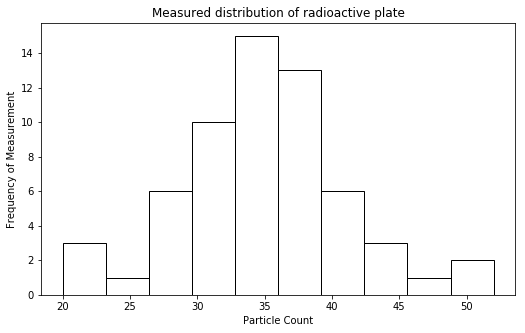

In [46]:
plt.figure(figsize=(8.5, 5))
bins_n = 10
range_n = ((int)(m.floor(min(n_s))), (int)(m.ceil(max(n_s))+1))
plt.hist(n_s, bins=bins_n, range=range_n, color='white', edgecolor='black', linewidth='1.0')
plt.xlabel('Particle Count')
plt.ylabel('Frequency of Measurement')
plt.title('Measured distribution of radioactive plate')
plt.savefig('hist.png', bbox_inches='tight')

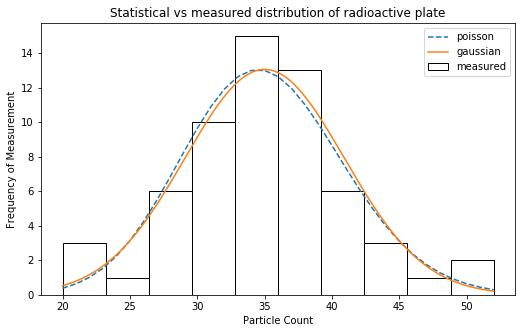

In [45]:
samples = 1000
space_pn = range(range_n[0], range_n[1]+1)
space_gn = np.linspace(range_n[0], range_n[1], num=samples)

bsize_n = (range_n[1] - range_n[0]) / bins_n

p_n = poisson.pmf(space_pn, mu=mu_c)
g_n = norm.pdf(space_gn, loc=mu_c, scale=m.sqrt(mu_c))

norm_pn = len(n_s) * bsize_n / sum(p)
norm_gn = samples * len(n_s) * bsize_n / (sum(g_n) * (range_n[1] - range_n[0]))

plt.figure(figsize=(8.5, 5))
plt.hist(n_s, bins=bins_n, range=range_n, color='white', edgecolor='black', linewidth='1.0', label='measured')
plt.plot(space_pn, norm_pn * p_n, linestyle='dashed', label='poisson')
plt.plot(space_gn, norm_gn * g_n, label='gaussian')
plt.xlabel('Particle Count')
plt.ylabel('Frequency of Measurement')
plt.title('Statistical vs measured distribution of radioactive plate')
plt.legend()
plt.savefig('histboth.png', bbox_inches='tight')

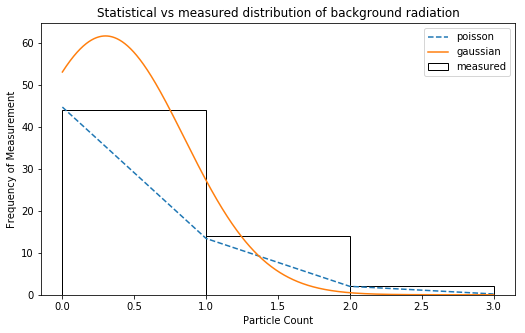

In [51]:
samples = 1000
bins_b = 3
range_b = ((int)(m.floor(min(background[:,1]))), (int)(m.ceil(max(background[:,1]))+1))
space_pb = range(range_b[0], range_b[1]+1)
space_gb = np.linspace(range_b[0], range_b[1], num=samples)

bsize_b = (range_b[1] - range_b[0]) / bins_b

p_b = poisson.pmf(space_pb, mu=n_b)
g_b = norm.pdf(space_gb, loc=n_b, scale=m.sqrt(n_b))

norm_pb = len(background[:,1]) * bsize_b / sum(p)
norm_gb = samples * len(background[:,1]) * bsize_b / (sum(g_b) * (range_b[1] - range_b[0]))

plt.figure(figsize=(8.5, 5))
plt.hist(background[:,1], bins=bins_b, range=range_b, 
         color='white', edgecolor='black', linewidth='1.0', label='measured')
plt.plot(space_pb, norm_pb * p_b, linestyle='dashed', label='poisson')
plt.plot(space_gb, norm_gb * g_b, label='gaussian')
plt.xlabel('Particle Count')
plt.ylabel('Frequency of Measurement')
plt.title('Statistical vs measured distribution of background radiation')
plt.legend()
plt.savefig('histback.png', bbox_inches='tight')